# **DATA VISUALISATION AND ANALYSIS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('f1_2022_2024_team_driver_results.csv')
df.head()

,Year,Race,TrackType,Driver,Team,GridPosition,QualifyingPosition,RacePosition,Status,TopSpeed,EstimatedOvertakes
0,2022,Bahrain,Permanent,LEC,Ferrari,1.0,1.0,1.0,Finished,299.0,0.0
1,2022,Bahrain,Permanent,SAI,Ferrari,3.0,3.0,2.0,Finished,301.0,1.0
2,2022,Bahrain,Permanent,HAM,Mercedes,5.0,5.0,3.0,Finished,300.0,2.0
3,2022,Bahrain,Permanent,RUS,Mercedes,9.0,9.0,4.0,Finished,300.0,5.0
4,2022,Bahrain,Permanent,MAG,Haas F1 Team,7.0,7.0,5.0,Finished,305.0,2.0


## TEAM ANALYSIS

In [3]:
# Adding Race Delta
df['RaceDelta'] = df['QualifyingPosition'] - df['RacePosition']

# Group by Year, Team, and TrackType
team_yearly = df.groupby(['Year', 'Team', 'TrackType']).agg({
    'QualifyingPosition': 'mean',
    'RacePosition': 'mean',
    'RaceDelta': 'mean',
    'TopSpeed': 'mean',
    'EstimatedOvertakes': 'sum'
}).reset_index().round(2)

team_yearly.head()


,Year,Team,TrackType,QualifyingPosition,RacePosition,RaceDelta,TopSpeed,EstimatedOvertakes
0,2022,Alfa Romeo,Hybrid,11.75,8.50,3.25,322.75,13.0
1,2022,Alfa Romeo,Permanent,13.00,13.36,-0.36,299.59,22.0
2,2022,Alfa Romeo,Street,13.50,13.80,-0.30,310.67,6.0
3,2022,AlphaTauri,Hybrid,15.00,14.00,1.00,315.50,3.0
4,2022,AlphaTauri,Permanent,14.04,13.32,0.71,311.61,-5.0


In [4]:
team_overall = df.groupby(['Team', 'TrackType']).agg({
    'QualifyingPosition': 'mean',
    'RacePosition': 'mean',
    'RaceDelta': 'mean',
    'TopSpeed': 'mean',
    'EstimatedOvertakes': 'sum'
}).reset_index().round(2)


In [5]:
# Scoring Metric
team_overall['Score'] = (
    (1 / team_overall['QualifyingPosition']) * 0.3 +
    (1 / team_overall['RacePosition']) * 0.4 +
    (team_overall['RaceDelta']) * 0.2 +
    (team_overall['EstimatedOvertakes']) * 0.1
)



### Team Performance During the Ground Effect Era (2022-2024)
*Scoring metric is sensible but arbitary*

/tmp/ipython-input-1359462252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2022['Score'] = (


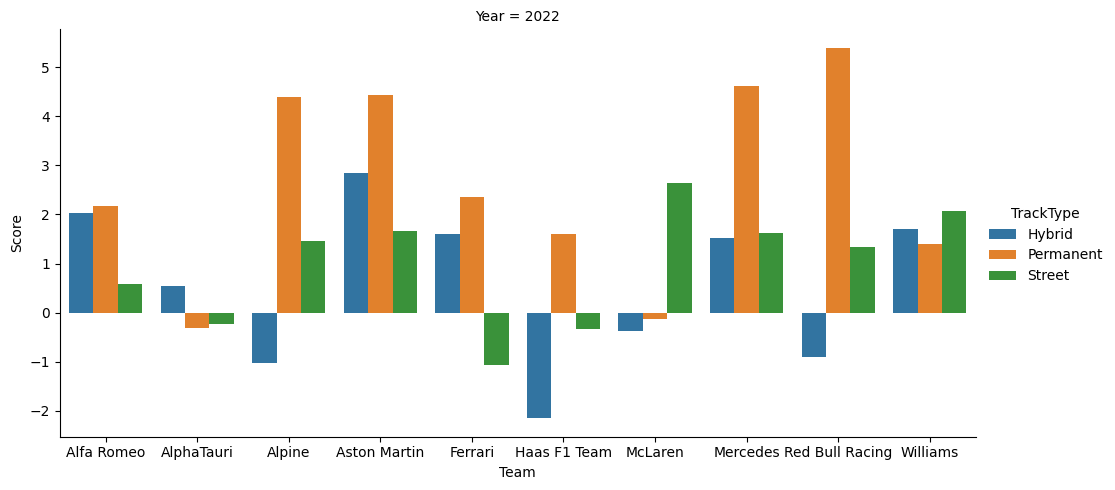

In [6]:
team_2022 = team_yearly[team_yearly['Year'] == 2022]
team_2022['Score'] = (
    (1 / team_2022['QualifyingPosition']) * 0.3 +
    (1 / team_2022['RacePosition']) * 0.4 +
    (team_2022['RaceDelta']) * 0.2 +
    (team_2022['EstimatedOvertakes']) * 0.1
)


team_2022.sort_values(by='Score', ascending=False)
sns.catplot(
    data=team_2022,
    x='Team', y='Score',
    hue='TrackType',
    col='Year',
    kind='bar',
    height=5, aspect=2
)




/tmp/ipython-input-3300537426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2023['Score'] = (


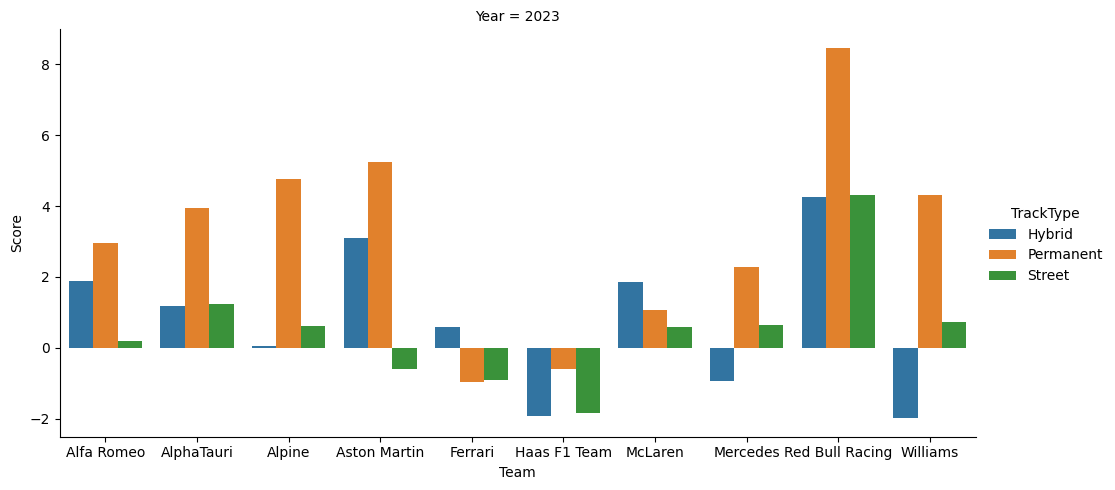

In [7]:
team_2023 = team_yearly[team_yearly['Year'] == 2023]
team_2023['Score'] = (
    (1 / team_2023['QualifyingPosition']) * 0.3 +
    (1 / team_2023['RacePosition']) * 0.4 +
    (team_2023['RaceDelta']) * 0.2 +
    (team_2023['EstimatedOvertakes']) * 0.1
)


team_2023.sort_values(by='Score', ascending=False)
sns.catplot(
    data=team_2023,
    x='Team', y='Score',
    hue='TrackType',
    col='Year',
    kind='bar',
    height=5, aspect=2
)




/tmp/ipython-input-3765708812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2024['Score'] = (


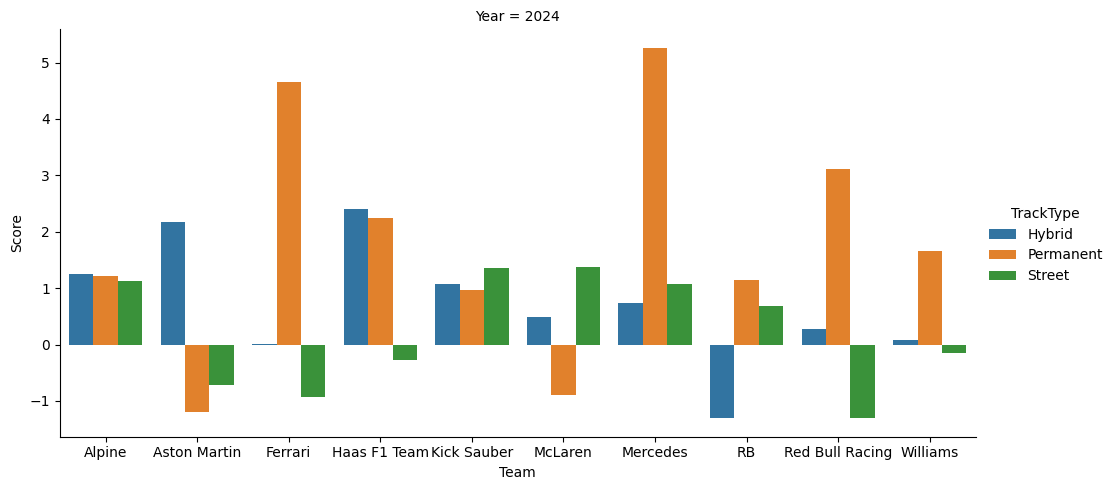

In [8]:
team_2024 = team_yearly[team_yearly['Year'] == 2024]
team_2024['Score'] = (
    (1 / team_2024['QualifyingPosition']) * 0.3 +
    (1 / team_2024['RacePosition']) * 0.4 +
    (team_2024['RaceDelta']) * 0.2 +
    (team_2024['EstimatedOvertakes']) * 0.1
)


team_2024.sort_values(by='Score', ascending=False)
sns.catplot(
    data=team_2024,
    x='Team', y='Score',
    hue='TrackType',
    col='Year',
    kind='bar',
    height=5, aspect=2
)




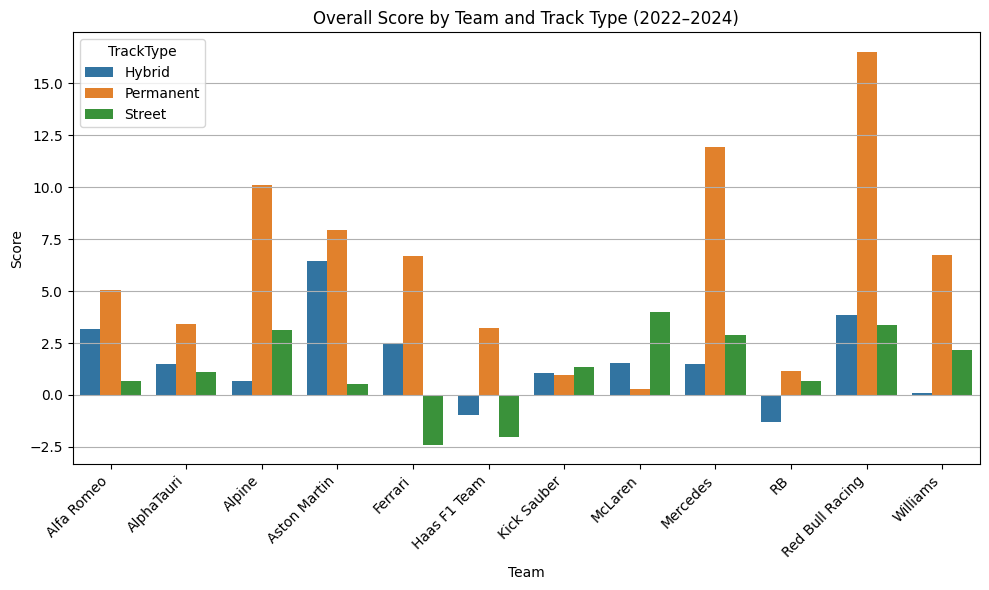

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=team_overall, x='Team', y='Score', hue='TrackType')
plt.title("Overall Score by Team and Track Type (2022–2024)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Team Performance based on Individual Metrics (Qualifying Position, Race Position, Race Delta, Top Speed and Overtakes)

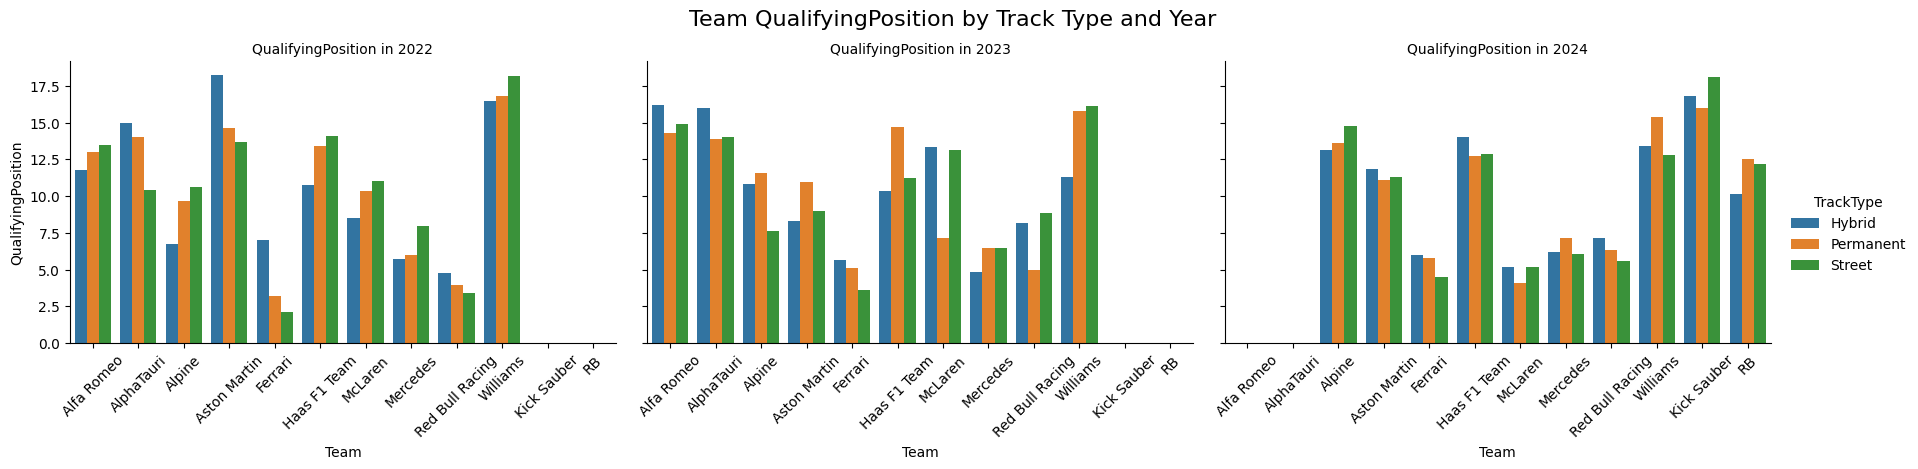

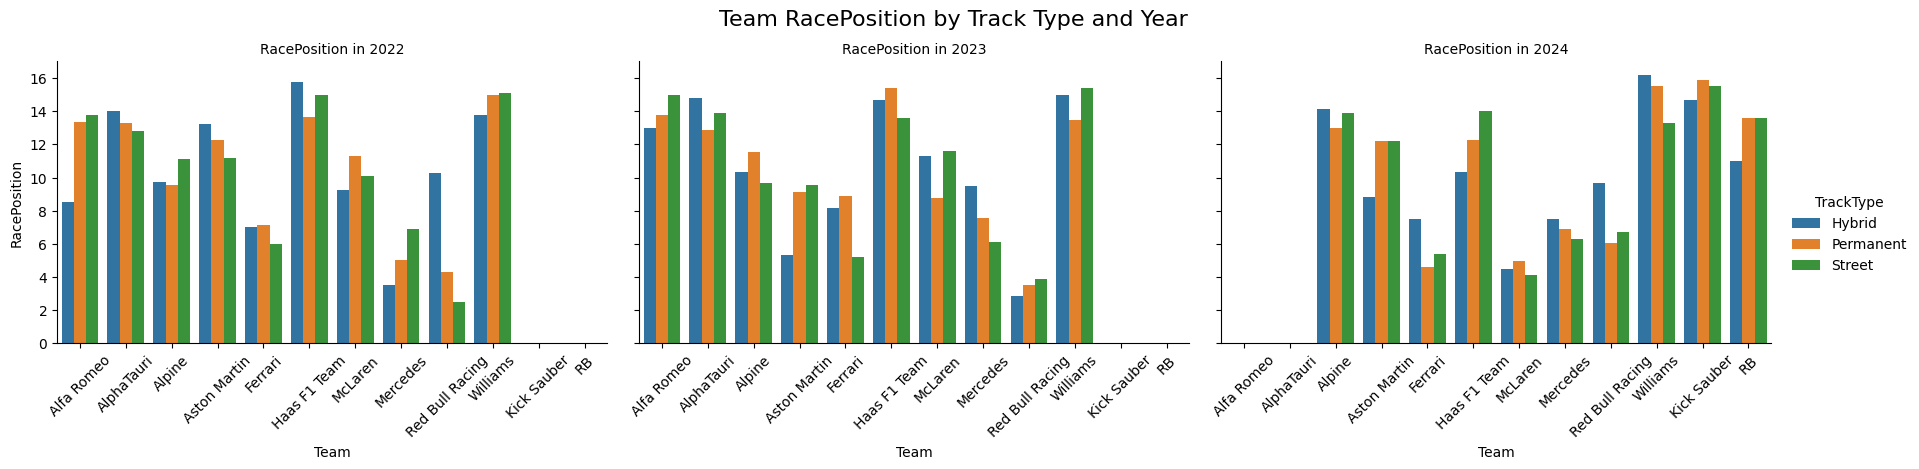

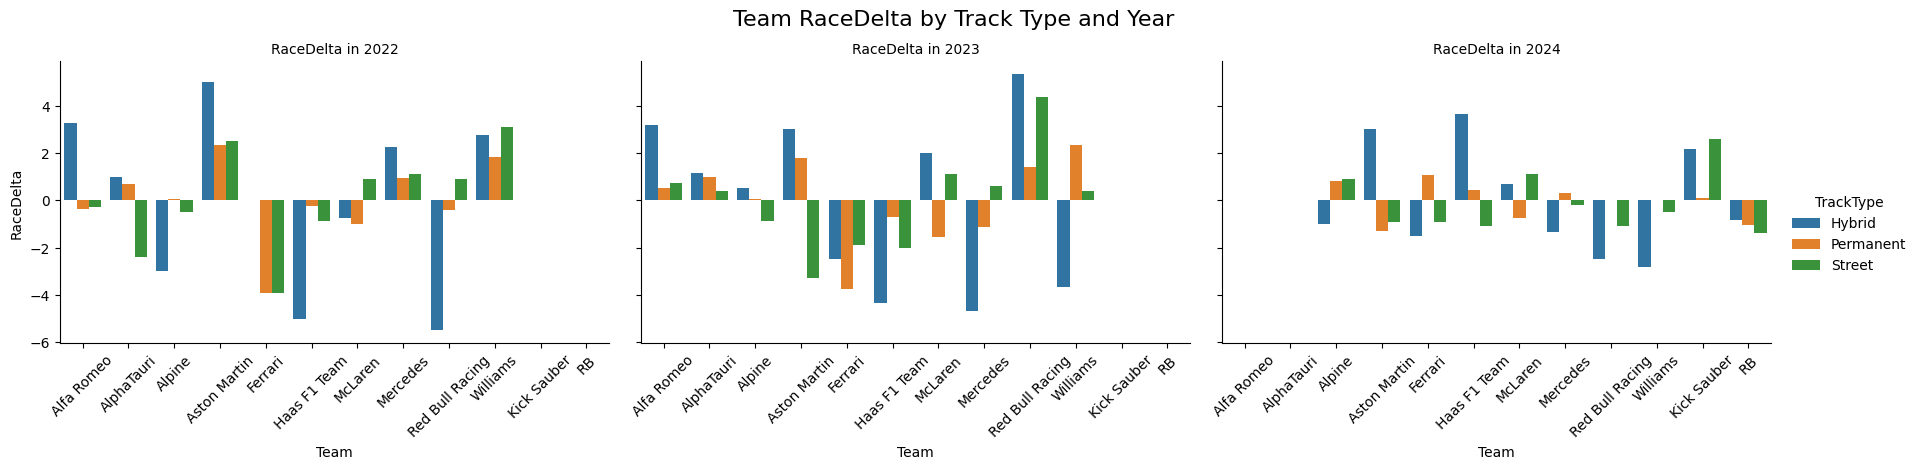

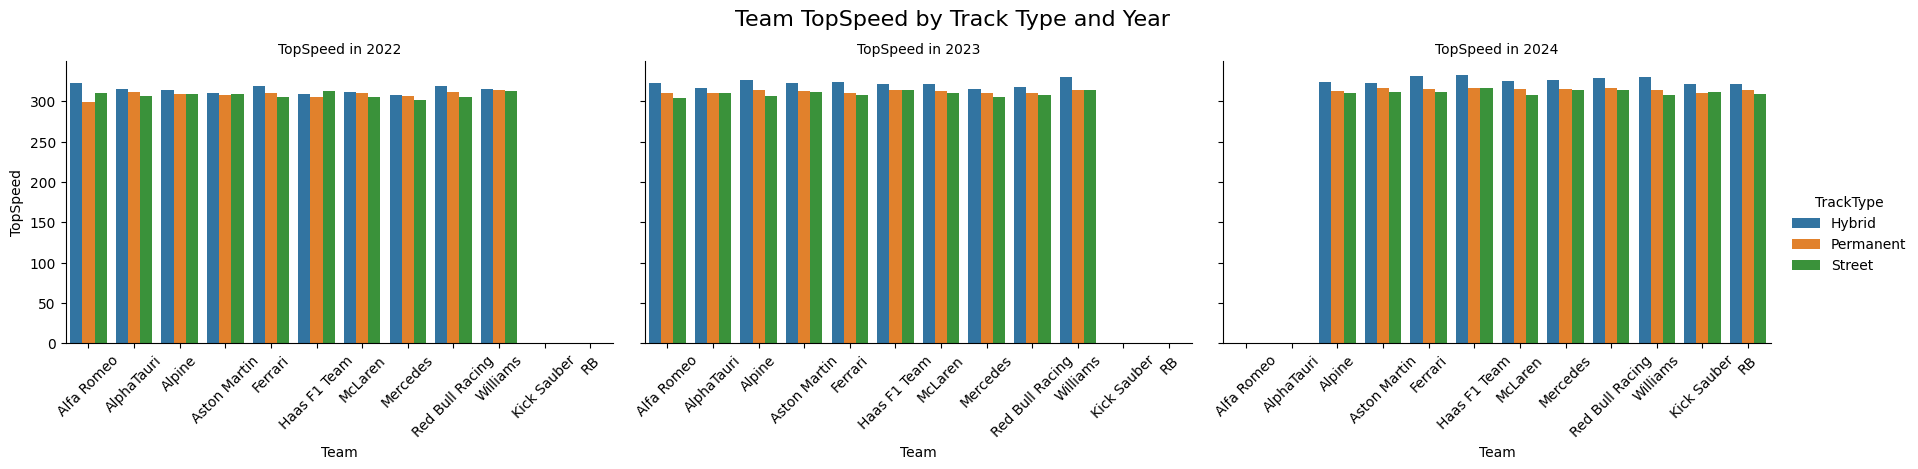

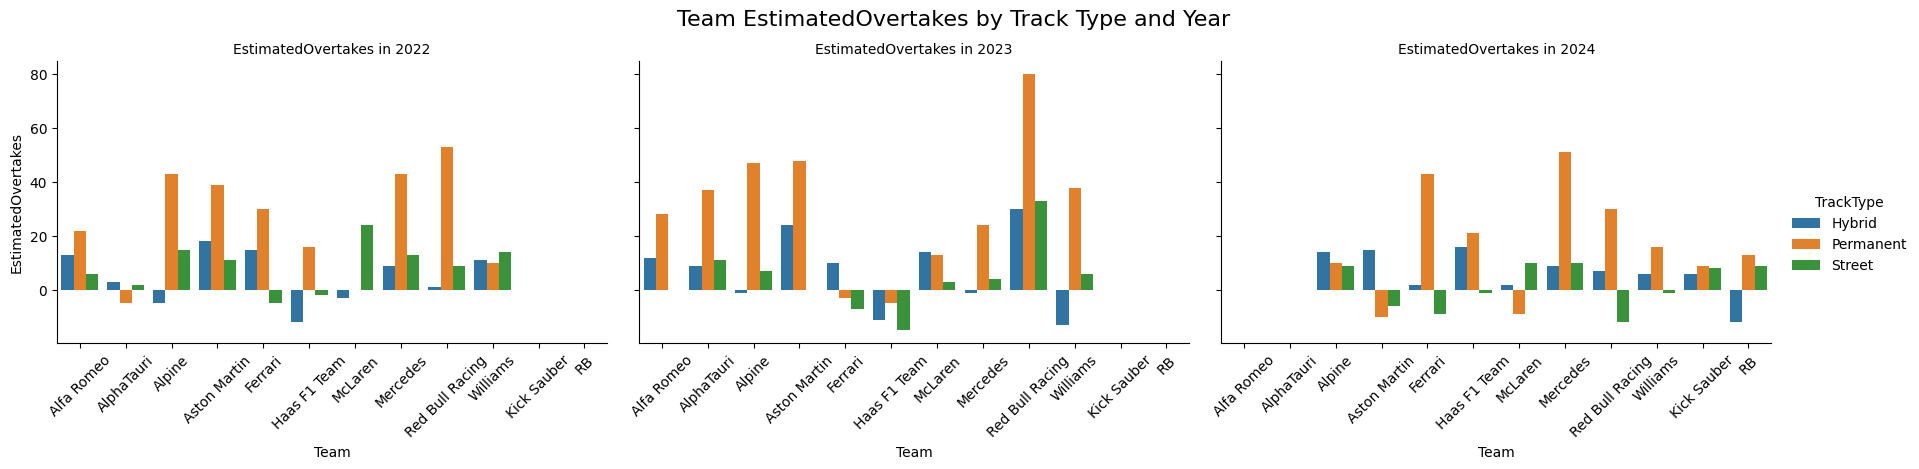

In [10]:
metrics = ['QualifyingPosition', 'RacePosition', 'RaceDelta', 'TopSpeed', 'EstimatedOvertakes']

# Looping through each metric
for metric in metrics:
    g = sns.catplot(
        data=team_yearly,
        x="Team", y=metric,
        hue="TrackType",
        col="Year",
        kind="bar",
        height=4, aspect=1.5
    )
    g.set_titles(f"{metric} in {{col_name}}")
    g.set_xticklabels(rotation=45)
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"Team {metric} by Track Type and Year", fontsize=16)
    plt.show()


### Performance by the Top Teams In Different Tracks

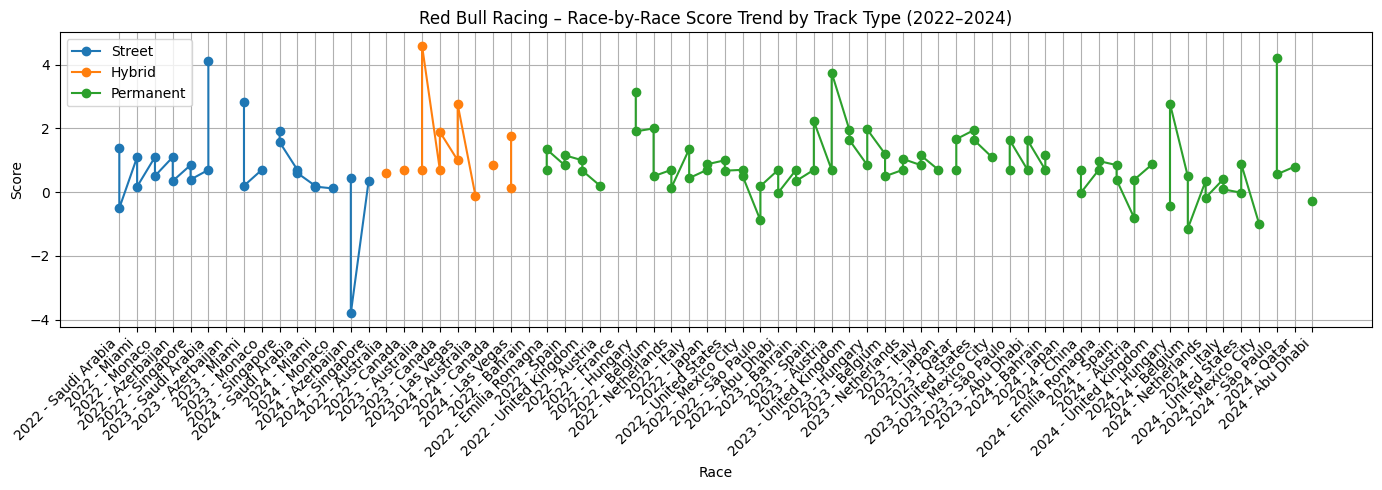

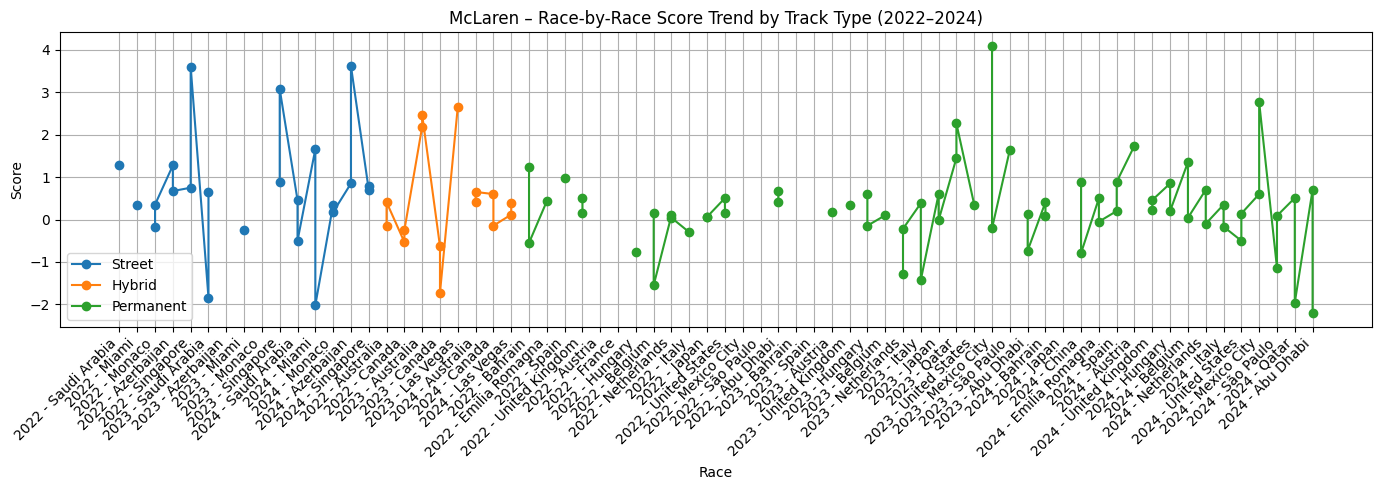

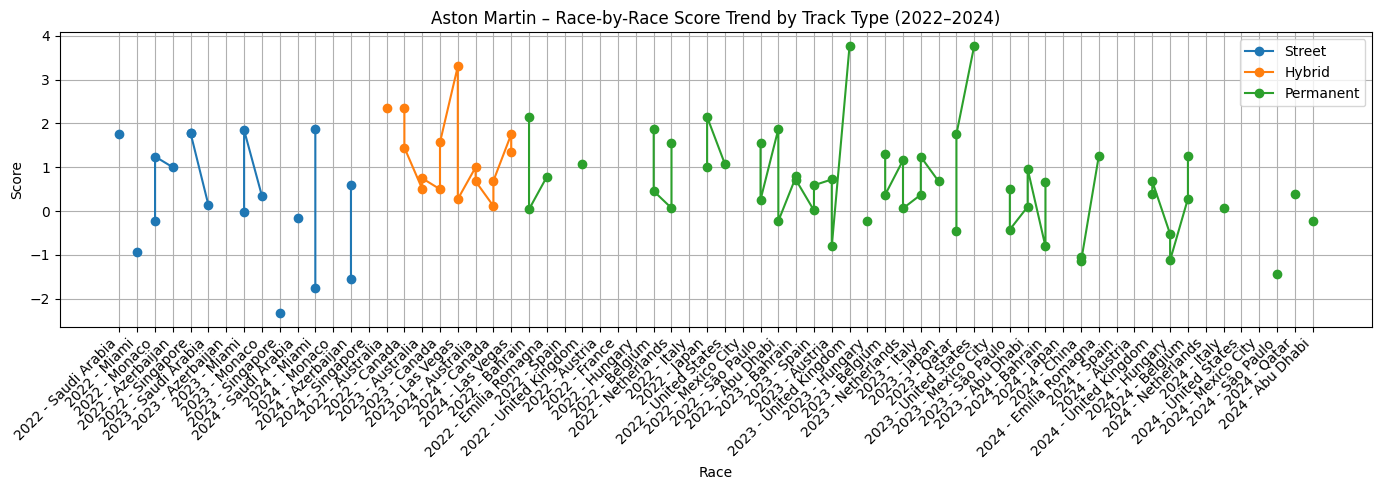

In [11]:
top_teams = ['Red Bull Racing', 'McLaren', 'Aston Martin']

# Race Delta and Score
df['RaceDelta'] = df['QualifyingPosition'] - df['RacePosition']
df['Score'] = (
    (1 / df['QualifyingPosition']) * 0.3 +
    (1 / df['RacePosition']) * 0.4 +
    df['RaceDelta'] * 0.2 +
    df['EstimatedOvertakes'] * 0.1
)

for team in top_teams:
    team_data = df[df['Team'] == team].copy()
    team_data['RaceLabel'] = team_data['Year'].astype(str) + ' - ' + team_data['Race']

    plt.figure(figsize=(14, 5))
    for track_type in ['Street', 'Hybrid', 'Permanent']:
        sub = team_data[team_data['TrackType'] == track_type]
        plt.plot(sub['RaceLabel'], sub['Score'], marker='o', label=track_type)

    plt.title(f"{team} – Race-by-Race Score Trend by Track Type (2022–2024)")
    plt.xlabel("Race")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## DRIVER ANALYSIS

In [12]:
# Create RaceDelta
df['RaceDelta'] = df['QualifyingPosition'] - df['RacePosition']

# Group by Year, Driver, TrackType
driver_yearly = df.groupby(['Year', 'Driver', 'TrackType']).agg({
    'QualifyingPosition': 'mean',
    'RacePosition': 'mean',
    'RaceDelta': 'mean',
    'TopSpeed': 'mean',
    'EstimatedOvertakes': 'sum'
}).reset_index().round(2)

# Group by Driver and TrackType across all years
driver_overall = df.groupby(['Driver', 'TrackType']).agg({
    'QualifyingPosition': 'mean',
    'RacePosition': 'mean',
    'RaceDelta': 'mean',
    'TopSpeed': 'mean',
    'EstimatedOvertakes': 'sum'
}).reset_index().round(2)

# Score
driver_yearly['Score'] = (
    (1 / driver_yearly['QualifyingPosition']) * 0.3 +
    (1 / driver_yearly['RacePosition']) * 0.4 +
    (driver_yearly['RaceDelta']) * 0.2 +
    (driver_yearly['EstimatedOvertakes']) * 0.1
)

driver_overall['Score'] = (
    (1 / driver_overall['QualifyingPosition']) * 0.3 +
    (1 / driver_overall['RacePosition']) * 0.4 +
    (driver_overall['RaceDelta']) * 0.2 +
    (driver_overall['EstimatedOvertakes']) * 0.1
)


### Driver Performance During the Ground Effect Era (2022-2024)
*Scoring metric is sensible but arbitary*

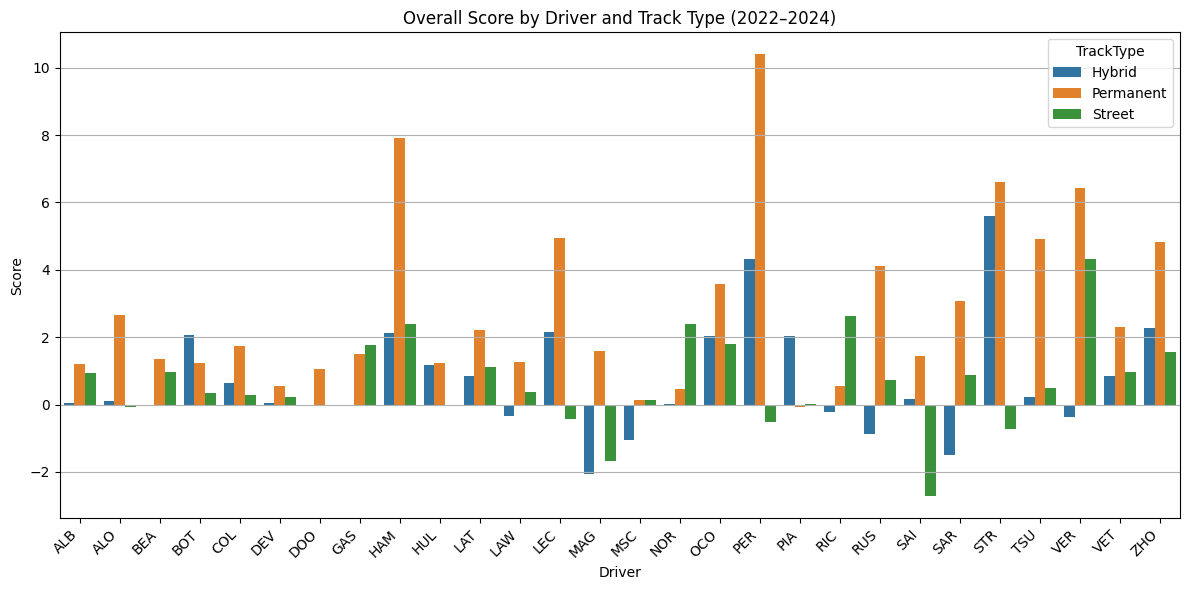

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=driver_overall, x='Driver', y='Score', hue='TrackType')
plt.title("Overall Score by Driver and Track Type (2022–2024)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


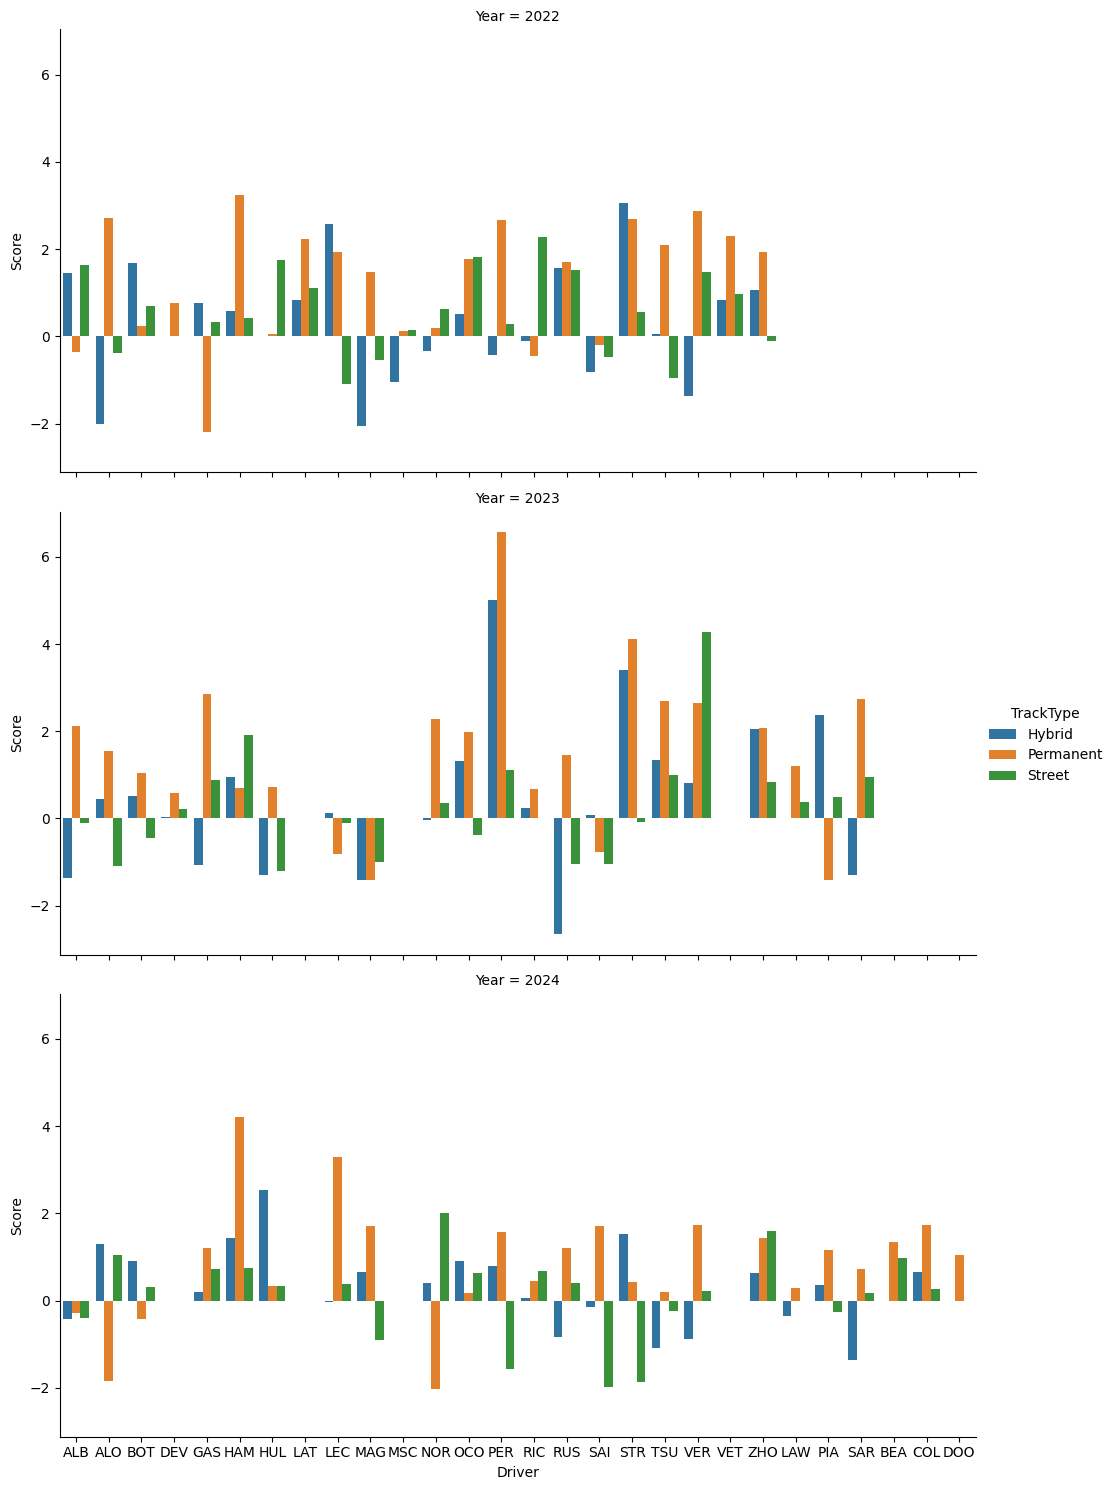

In [14]:
sns.catplot(
    data=driver_yearly,
    x='Driver', y='Score',
    hue='TrackType',
    col='Year',
    col_wrap=1,           # ⬅️ Wraps each "col" into its own row
    kind='bar',
    height=5, aspect=2
)


### Driver Performance based on Individual Metrics (Qualifying Position, Race Position, Race Delta, Top Speed and Overtakes)

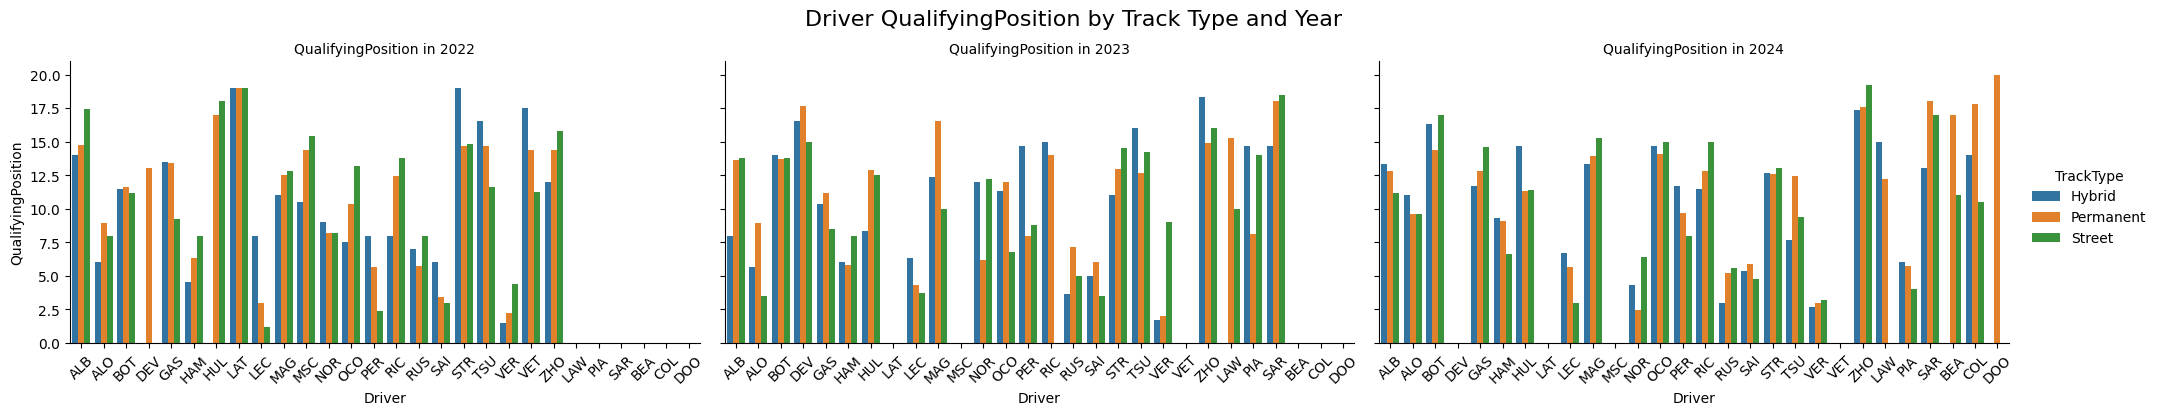

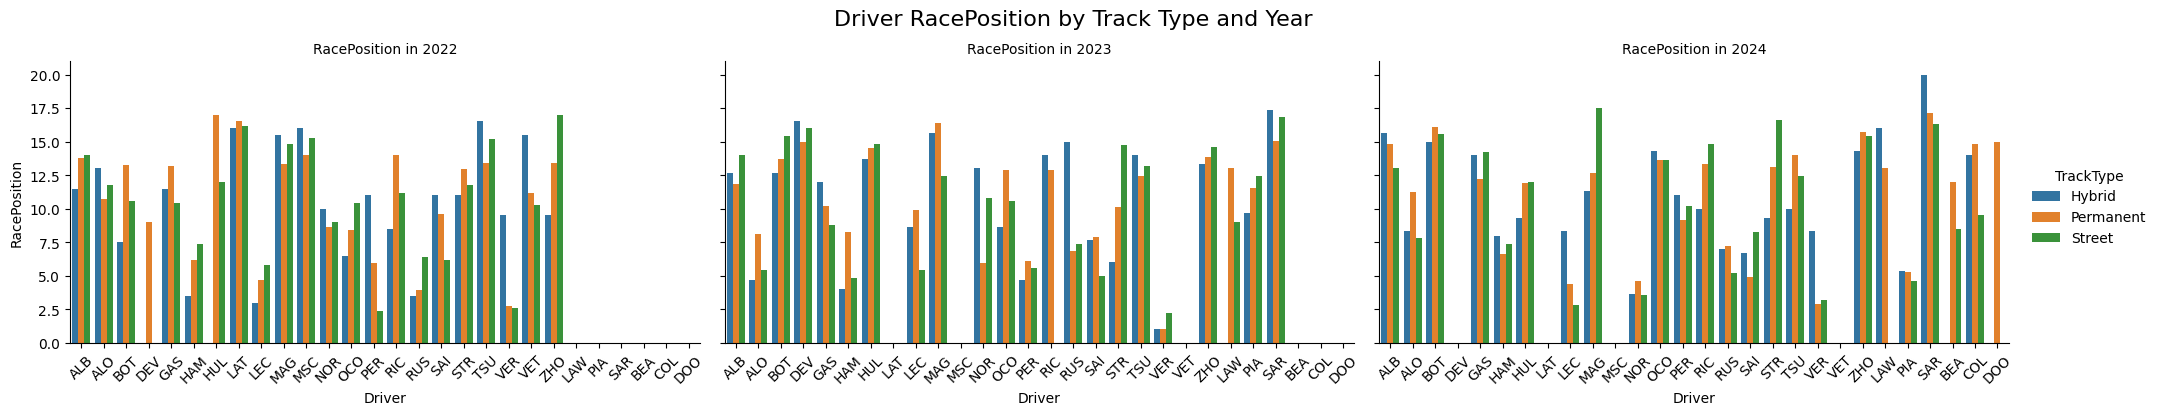

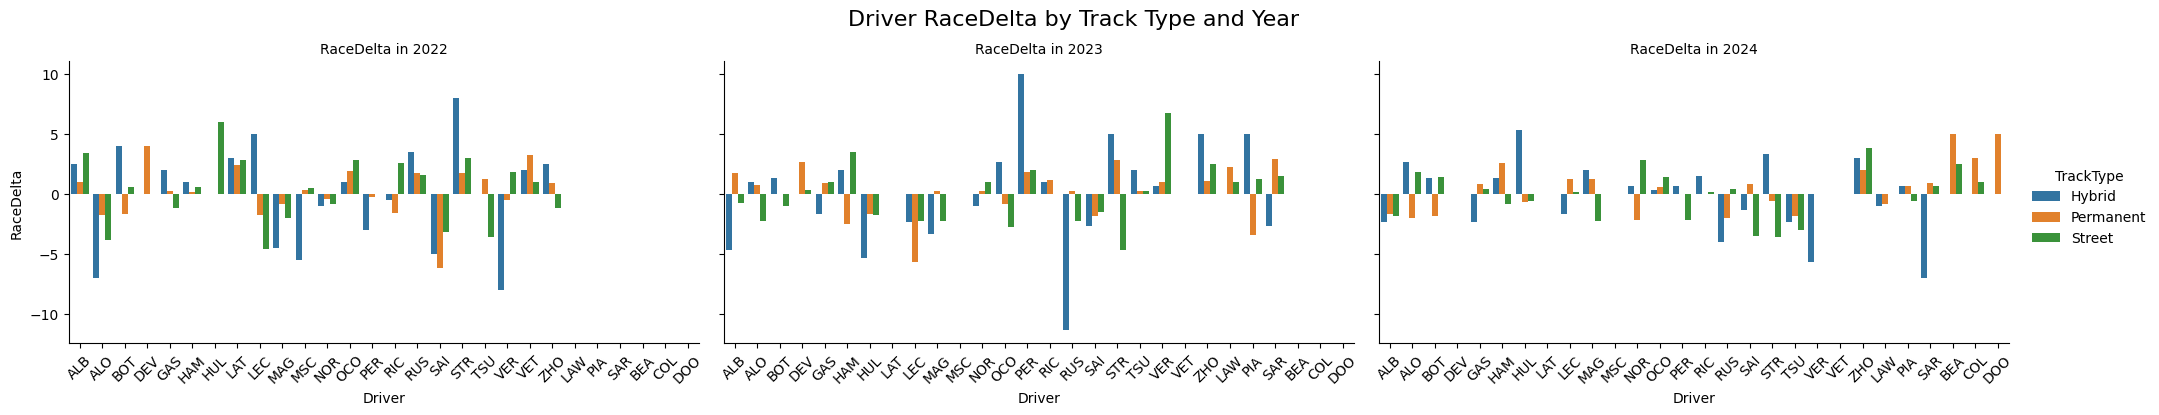

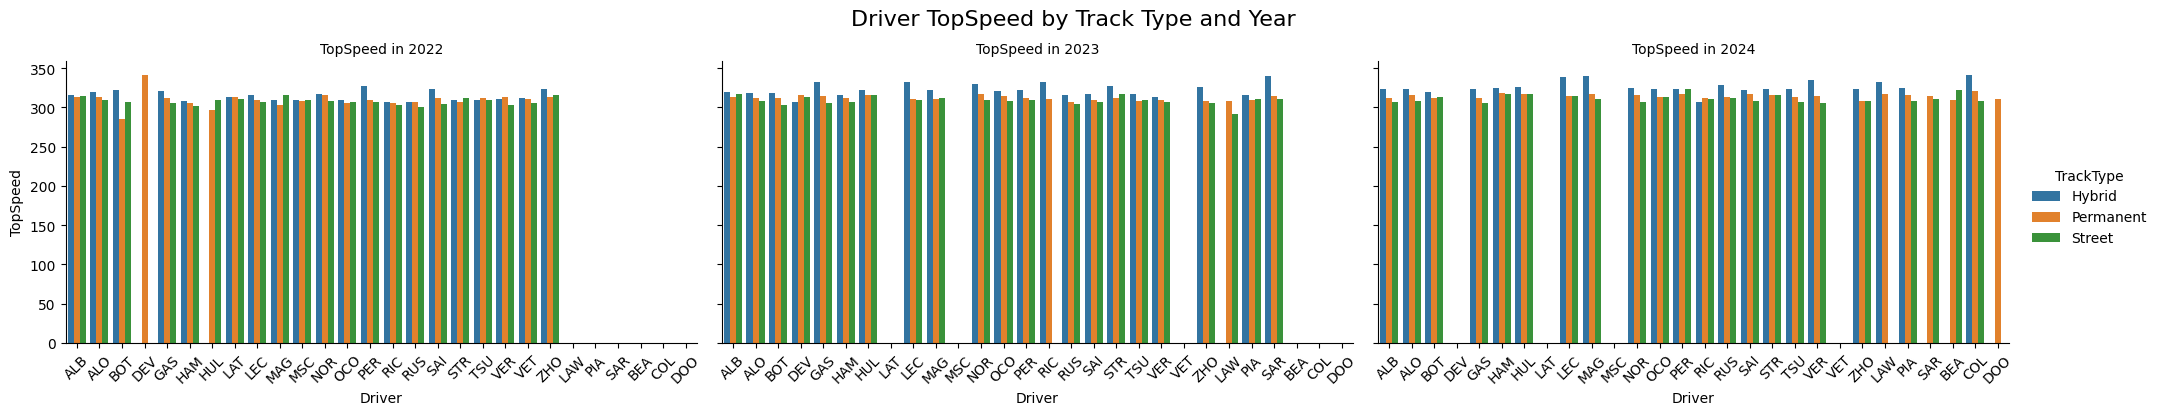

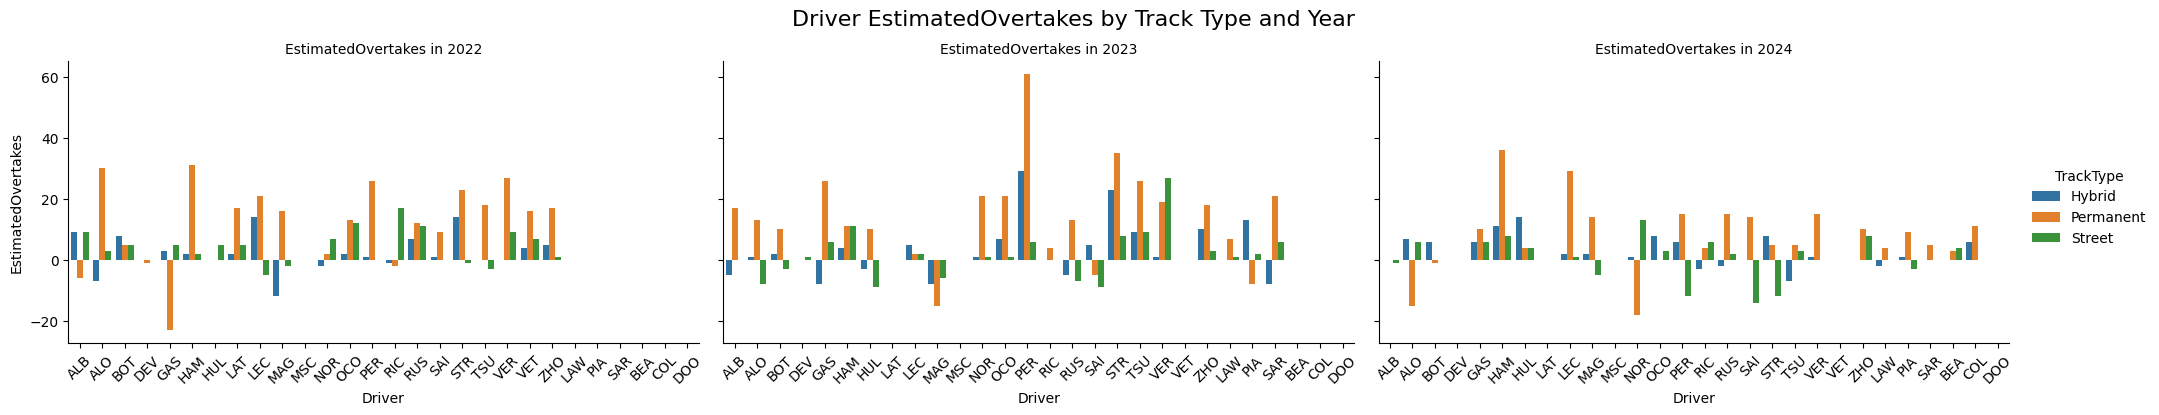

In [15]:
metrics = ['QualifyingPosition', 'RacePosition', 'RaceDelta', 'TopSpeed', 'EstimatedOvertakes']

#Looping thorugh the metrics
for metric in metrics:
    g = sns.catplot(
        data=driver_yearly,
        x="Driver", y=metric,
        hue="TrackType",
        col="Year",
        kind="bar",
        height=4, aspect=1.7
    )
    g.set_titles(f"{metric} in {{col_name}}")
    g.set_xticklabels(rotation=45)
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f"Driver {metric} by Track Type and Year", fontsize=16)
    plt.show()


### Determining The Three Best Tracks For Top Drivers (Verstappen, Leclerc, Norris and Hamilton)

In [16]:
# Target drivers
drivers = ['VER', 'LEC', 'NOR', 'HAM']

# Group by Driver and Race to calculate average performance per track
track_perf = df[df['Driver'].isin(drivers)].groupby(['Driver', 'Race']).agg({
    'RacePosition': 'mean'
}).reset_index()

# Top 3 tracks of each driver
top_tracks = track_perf.sort_values(['Driver', 'RacePosition']).groupby('Driver').head(3)

print(top_tracks)


   Driver            Race  RacePosition
14    HAM     Mexico City      2.666667
10    HAM         Hungary      3.000000
6     HAM          Canada      3.333333
25    LEC       Abu Dhabi      2.333333
36    LEC           Italy      2.333333
38    LEC       Las Vegas      3.000000
57    NOR           China      2.000000
70    NOR       Singapore      2.333333
58    NOR  Emilia Romagna      2.500000
81    VER          Canada      1.000000
82    VER           China      1.000000
83    VER  Emilia Romagna      1.000000


## **FURTHER** **CHARTS**

### Heatmap of Average Race Position by Team Based on Track Type

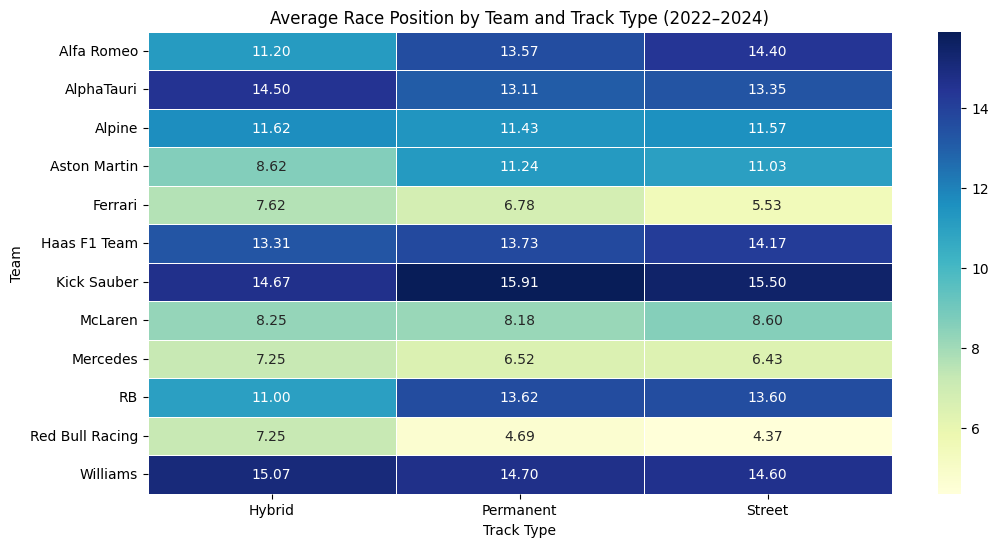

In [17]:
team_perf = df.groupby(['Team', 'TrackType'])['RacePosition'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(team_perf, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Race Position by Team and Track Type (2022–2024)")
plt.ylabel("Team")
plt.xlabel("Track Type")
plt.show()


### Race Delta By Team And Driver

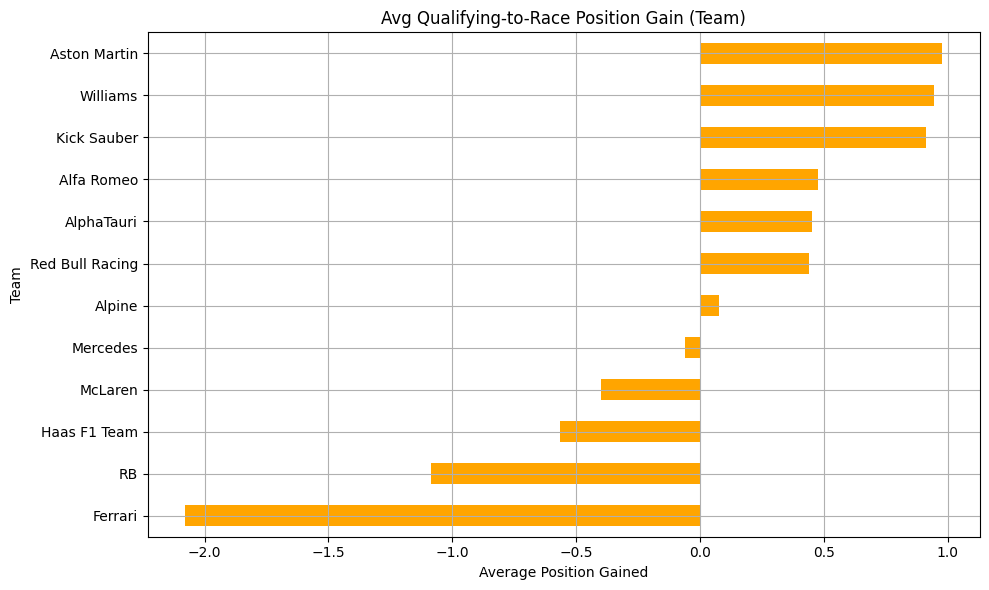

In [18]:
# Race Delta
df['QualiRaceDelta'] = df['QualifyingPosition'] - df['RacePosition']
delta_data = df.groupby('Team')['QualiRaceDelta'].mean().sort_values()

delta_data.plot(kind='barh', figsize=(10, 6), color='orange', title="Avg Qualifying-to-Race Position Gain (Team)")
plt.xlabel("Average Position Gained")
plt.grid(True)
plt.tight_layout()
plt.show()


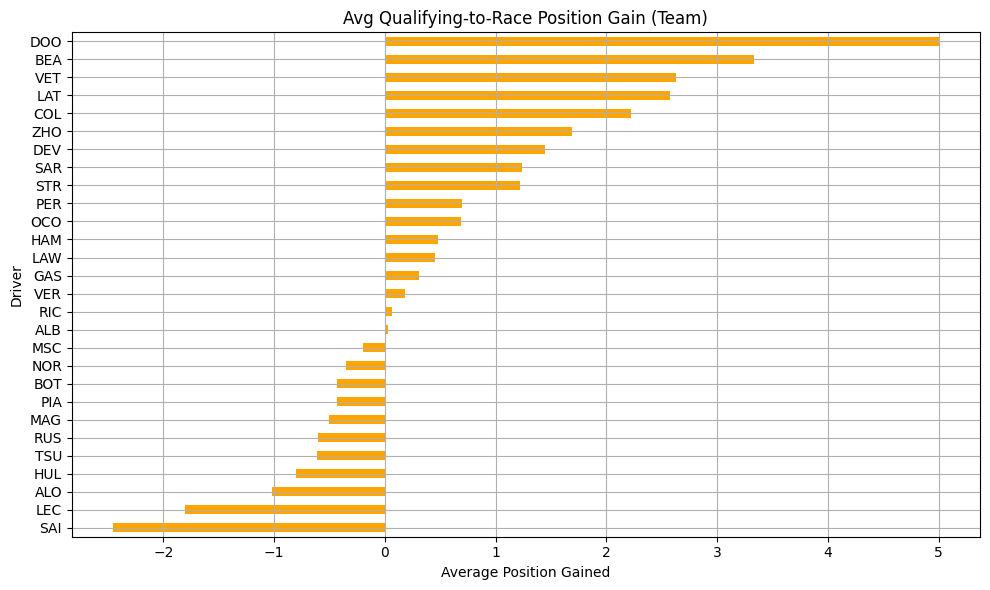

In [19]:
df['QualiRaceDelta'] = df['QualifyingPosition'] - df['RacePosition']
delta_data = df.groupby('Driver')['QualiRaceDelta'].mean().sort_values()

delta_data.plot(kind='barh', figsize=(10, 6), color='orange', title="Avg Qualifying-to-Race Position Gain (Team)")
plt.xlabel("Average Position Gained")
plt.grid(True)
plt.tight_layout()
plt.show()


## QualifyingPosition vs RacePosition



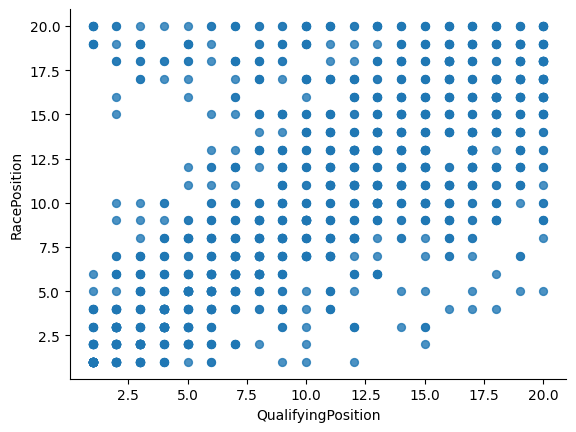

In [20]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='QualifyingPosition', y='RacePosition', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### GridPosition vs QualifyingPosition

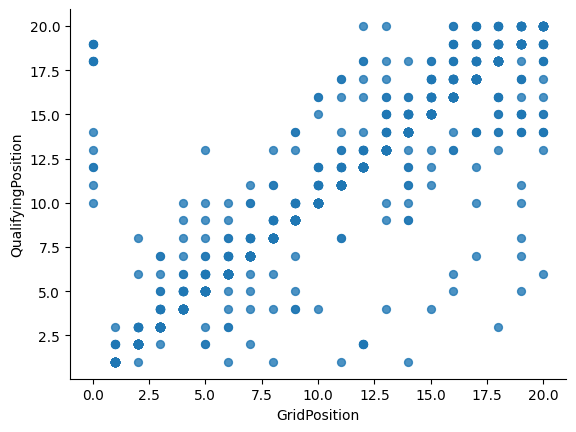

In [21]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GridPosition', y='QualifyingPosition', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)